<a href="https://colab.research.google.com/github/adolfoguimaraes/teoriadosgrafos/blob/main/atividades/Atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1 

Agora é com vocês. Nessa atividade vocês vão utilizar os métodos implementados nas aulas para resolver alguns problemas relacionados à teoria dos grafos. Preparados? 

Para que vocês entendam como funciona, o primeiro problema já está resolvido. Vamos no passo a passo para entender como saímos da descrição e utilizamos um método já implementdo para resolvê-lo. 

<img src="https://media.giphy.com/media/CjmvTCZf2U3p09Cn0h/giphy.gif" width="30%" />

In [ ]:
# importando a biblioteca 

import networkx as nx
import math

# importação da biblioteca para plotagem de gráficos 
import matplotlib.pyplot as plt


In [ ]:
def exibir_grafo_q1(grafo):
  
  

  colors = ['red' if grafo[u][v]['asfaltada'] == False else 'green' for u,v in grafo.edges()]

  options = {
      'node_color': 'darkblue',
      'edge_color': colors,
      'node_size': 600,
      'width': 2,
      'font_color': 'white',
      'font_weight': 'bold',
      'font_size': 10

  }

  plt.figure(1)
  
  nx.draw_networkx(
      grafo, 
      pos=nx.spring_layout(grafo), 
      with_labels=True,
      **options
  )

  
  plt.show()

In [ ]:
def exibir_grafo_q2(grafo):
  
  

  options = {
      'node_color': 'darkblue',
      'edge_color': '#808080',
      'node_size': 600,
      'width': 2,
      'font_color': 'white',
      'font_weight': 'bold',
      'font_size': 10

  }
  plt.figure(1)
  
  nx.draw_networkx(
      grafo, 
      pos=nx.spring_layout(grafo), 
      with_labels=True,
      **options
  )

  labels = nx.get_edge_attributes(grafo,'impacto')   

  nx.draw_networkx_edge_labels(grafo, pos=nx.spring_layout(grafo), edge_labels=labels)

  
  plt.show()

In [ ]:
def exibir_grafo_q3(grafo):
  options = {
      'node_color': 'darkblue',
      'edge_color': '#808080',
      'node_size': 600,
      'width': 2,
      'font_color': 'white',
      'font_weight': 'bold',
      'font_size': 10

  }
  plt.figure(1)
  
  nx.draw_networkx(
      grafo, 
      pos=nx.spring_layout(grafo), 
      with_labels=True,
      **options
  )

  
  plt.show()

In [ ]:
def exibir_grafo_q4(grafo):
  options = {
      'node_color': 'darkblue',
      'edge_color': '#808080',
      'node_size': 600,
      'width': 2,
      'font_color': 'white',
      'font_weight': 'bold',
      'font_size': 10

  }
  plt.figure(1)
  
  nx.draw_networkx(
      grafo, 
      pos=nx.spring_layout(grafo), 
      with_labels=True,
      **options
  )

  
  plt.show()

## Problema 1 

Um empresa está fazendo o mapeamento de uma região composta por conjuntos de casas que podem ser conectadas por estradas asfaltadas e estradas sem asfalto. O objetivo é agrupar qual conjunto de casas estão conectadas direta ou indiretamente por meio de estradas asfaltadas. A imagem a seguir representa uma imagem da região. 

<img src="https://data2learning.com/static_imgs/grafos_img1.png" />

Cada vértice representa um conjunto de casas. As arestas pontilhadas representam as estradas sem asfalto, as demais são estradas com asfalto. 

Implemente um algoritmo com base nos algoritmos estudados que permita identificar o conjunto de casas que estão conectados por estradas asfaltadas. Considere que seu algoritmo recebe como entrada um grafo da região com uma indicação em cada aresta que indique se aquela aresta está asfaltada ou não. 

O grafo está mapeado a seguir:

*As arestas verdes são as asfaltadas e as vermelhas as não asfaltadas*

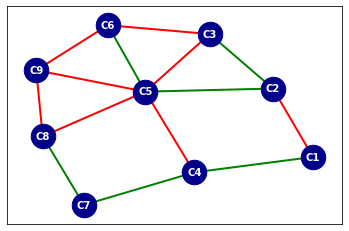

In [ ]:
# Instanciando o objeto Grafo
G1 = nx.Graph()

# Adicionando os Vértices
G1.add_nodes_from(["C1","C2","C3","C4","C5","C6","C7","C8","C9"])

# Adicionando as Arestas
G1.add_edge("C1", "C2", asfaltada=False)
G1.add_edge("C1", "C4", asfaltada=True)
G1.add_edge("C2", "C3", asfaltada=True)
G1.add_edge("C2", "C5", asfaltada=True)
G1.add_edge("C3", "C5", asfaltada=False)
G1.add_edge("C3", "C6", asfaltada=False)
G1.add_edge("C4", "C5", asfaltada=False)
G1.add_edge("C4", "C7", asfaltada=True)
G1.add_edge("C5", "C6", asfaltada=True)
G1.add_edge("C5", "C8", asfaltada=False)
G1.add_edge("C5", "C9", asfaltada=False)
G1.add_edge("C6", "C9", asfaltada=False)
G1.add_edge("C7", "C8", asfaltada=True)
G1.add_edge("C8", "C9", asfaltada=False)


exibir_grafo_q1(G1)


**Como podemos resolver esse problema?**

<img src="https://media.giphy.com/media/aTeHNLRLrwwwM/giphy.gif" />

A gente viu em sala de aula que podemos usar os algoritmos de busca em largura ou busca em profundidade para encontrar os componentes conexos de um grafo. Ou seja, encontrar dentro de um grafo desconexo aqueles componentes que são conexos. Se a gente tivesso grafo sem as arestas em vermelho, podíamos aplicar diretamente essa técnica para resolver. O que não é o caso, o nosso grafo é conexo e tem as arestas asfaltadas e não-asfaltadas. 

No entanto, ainda podemos usar essa abordagem se modificarmos nosso algoritmo de busca para andar somene por arestas que estão asfaltadas. Lembre que temos essa informação como um atributo da arestas. Sendo assim, nossa proposta é: 

* Usar o algoritmo de busca em profundidade (podia ser o de busca em largura também);
* Modificar o algoritmo de busca para que ele considere como adjacente somente as arestas asfaltadas (lembre que tempos essa informação);
* Aplicar o algoritmo ao grafo salvando a lista de vértices cada vez que a pilha fica vazia.

Vamos implementar ;) 

In [ ]:
## Código do Algoritmo de Busca


# Função nova implementada que retorna se a aresta está asfaltada ou não
def get_info_asfaltada(grafo, v1, v2):
    return grafo.get_edge_data(v1, v2, 'asfaltada')['asfaltada']


# Função que retorna um vértice adjacente não-visitado
# de um vértice passado como parâmetro

def get_no_visted_neighbors(graph_, node, v):
  neighbors_node = [x for x in list(nx.neighbors(graph_, node)) if x not in v and get_info_asfaltada(graph_, node, x)] # <-- A modificação será feita nessa parte 
  if len(neighbors_node) > 0: return neighbors_node[0]
  else: None

def dfs(graph):

  not_visited = list(graph.nodes())
  count = 1
  while len(not_visited) > 0:
    node_start = not_visited[0]
    visited, explored = dfs_interative(graph, node_start, not_visited)
    print("Grupo %i: %s" % (count, visited)) # <-- Modifiquei aqui para imprimir os grupos.
    count += 1
    

def dfs_interative(graph, v, list_not_visited):

  stack_ = []
  visited_ = []
  explored_ = []

  stack_.append(v)
  visited_.append(v)
  list_not_visited.remove(v)

  while len(stack_) > 0:
    top_stack = stack_[-1]
    node_not_visited = get_no_visted_neighbors(graph, top_stack, visited_)
    if node_not_visited:
      stack_.append(node_not_visited)
      visited_.append(node_not_visited)
      list_not_visited.remove(node_not_visited)
    else:
      explored_.append(stack_.pop())

  return visited_, explored_


Ao aplicar a busca em profundidade no grafo, temos exatamente os grupos que são conectados somente por estradas asfaltadas. 

In [ ]:
dfs(G1)

Grupo 1: ['C1', 'C4', 'C7', 'C8']
Grupo 2: ['C2', 'C3', 'C5', 'C6']
Grupo 3: ['C9']


**Agora é com vocês**

<img src="https://media.giphy.com/media/wSEfdRVws2Hoo4aOEE/giphy.gif" />

## Problema 2

Os caciques de uma região pretendem integrar suas tribos à chamada “aldeia global”. A primeira providência foi a distribuição de telefones celulares a todos os pajés. Agora, os caciques planejam montar uma rede de fibra ótica interligando todas as tabas. Esta empreitada requer que sejam abertas novas picadas na mata, passando por reservas de flora e fauna. Conscientes da necessidade de preservar o máximo possível o meio ambiente, os caciques encomendaram um estudo do impacto ambiental do projeto. Será que você consegue ajudá-los a projetar a rede de fibra ótica? Vamos denominar uma ligação de fibra ótica entre duas tabas de um ramo de rede. Para possibilitar a comunicação entre todas as tabas é necessário que todas elas estejam interligadas, direta (utilizando um ramo de rede) ou indiretamente (utilizando mais de um ramo). Os caciques conseguiram a informação do impacto ambiental que causará a construção dos ramos. Alguns ramos, no entanto, nem foram considerados no estudo ambiental, pois sua construção é impossível. A imagem a seguir mostrar a estrutura atual da aldeia. Os vértices representam as tabas e as arestas as possíveis conexões de redes com um valor que mede o impacto ambiental da construção da rede. Quanto maior o valor, maior o impacto ambiental.

<img src="https://data2learning.com/static_imgs/grafos_img3.png" />

O grafo acima está representado no grafo a seguir: 

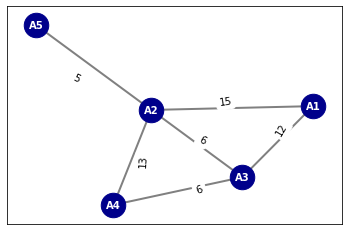

In [ ]:
# Instanciando o objeto Grafo
G2 = nx.Graph()

# Adicionando os Vértices
G2.add_nodes_from(["A1","A2","A3","A4","A5"])

# Adicionando as Arestas
G2.add_edge("A1","A2", impacto=15)
G2.add_edge("A1","A3", impacto=12)
G2.add_edge("A2","A3", impacto=6)
G2.add_edge("A2","A4", impacto=13)
G2.add_edge("A2","A5", impacto=5)
G2.add_edge("A3","A4", impacto=6)



exibir_grafo_q2(G2)


*Explique qual algoritmo vocês vão utilizaar para resolver o problema e quais modificações serão feitas se necessário*

In [ ]:
# Copie e cole nessa célula o algoritmo que será utilizado. Modifique-o e indique as linhas que serão modificadas.


In [ ]:
# Aplique o algoritmo ao grafo G2 e mostre o resultado. 

## Problema 3

A imagem a seguir representa os usuários de uma rede social e suas conexões. Deseja-se a partir de um usuário da rede descobrir quantos parentes ele está conectado diretamente e indiretamente. Além disso, deseja-se saber a que distância está o parente mais próximo dele. Sabendo que você tem uma lista de pessoas consideradas parentes. Aplique um algoritmo que dê as informações desejadas. O seu algoritmo deve receber a lista de parentes e o grafo da rede social. Como retorno, ele deve retornar quais  parentes estão conectados a ele, quem é o parente mais próximo e sua distância. Lembrando que distância é o número de conexões. 

<img src="https://data2learning.com/static_imgs/grafos_img2.png" width="40%" />


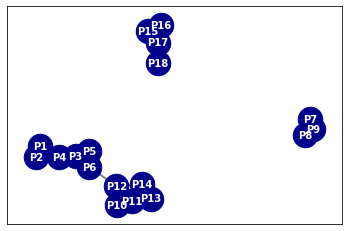

In [ ]:
# Instanciando o objeto Grafo
G3 = nx.Graph()

# Adicionando os Vértices
G3.add_nodes_from(["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18"])

# Adicionando as Arestas
G3.add_edge("P1","P2")
G3.add_edge("P1","P4")
G3.add_edge("P2","P4")
G3.add_edge("P3","P4")
G3.add_edge("P3","P5")
G3.add_edge("P3","P6")
G3.add_edge("P4","P6")
G3.add_edge("P5","P6")
G3.add_edge("P6","P12")
G3.add_edge("P7","P8")
G3.add_edge("P7","P9")
G3.add_edge("P8","P9")
G3.add_edge("P10","P11")
G3.add_edge("P10","P12")
G3.add_edge("P11","P12")
G3.add_edge("P11","P13")
G3.add_edge("P12","P14")
G3.add_edge("P13","P14")
G3.add_edge("P15","P16")
G3.add_edge("P15","P17")
G3.add_edge("P16","P17")
G3.add_edge("P17","P18")

exibir_grafo_q3(G3)


*Explique qual algoritmo vocês vão utilizaar para resolver o problema e quais modificações serão feitas se necessário*

In [ ]:
# Copie e cole nessa célula o algoritmo que será utilizado. Modifique-o e indique as linhas que serão modificadas.


In [ ]:
# Aplique o algoritmo ao grafo G3 e mostre o resultado. 

## Problema 4

Um grupo de estudantes está construindo um grafo para representar o caminho de um robô. A proposta do robô é que ele percorra todos os vértices, sem repetir arestas e retorne para o vértice de origem. No entanto, eles estão com algumas dúvidas em sua construção. A imagem a seguir mostra o grafo que eles estão querendo criar. **Os vértices X1, X2, X3 e X4 juntamente com as arestas pontilhadas ainda não foram adicionados ao grafo**. 

Por uma questão de limitação do robô, eles só podem adicionar mais dois vértices. A dúvida é: quais vértices eles devem adicionar para garantir o objetivo inicial? Sabendo disso, indique quais vértices devem ser adicionados ao grafo e explique porque. Em seguida, escolha o algoritmo apropriado para resolver esse problema e aplique ao grafo. Ao final, informe qual o caminho que o robô deve seguir para atingir o objetivo do problema.

<img src="https://data2learning.com/static_imgs/grafos_img4.png" />



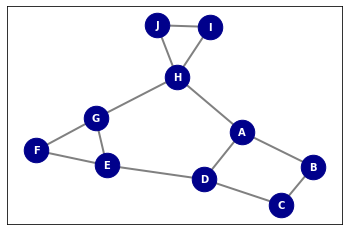

In [ ]:
# Instanciando o objeto Grafo
G4 = nx.Graph()

# Adicionando os Vértices
G4.add_nodes_from(["A","B","C","D","E","F","G","H","I","J"])

# Adicionando as Arestas
G4.add_edge("A","B")
G4.add_edge("A","D")
G4.add_edge("A","H")
G4.add_edge("B","C")
G4.add_edge("C","D")
G4.add_edge("D","E")
G4.add_edge("E","F")
G4.add_edge("E","G")
G4.add_edge("F","G")
G4.add_edge("G","H")
G4.add_edge("H","I")
G4.add_edge("H","J")
G4.add_edge("I","J")


exibir_grafo_q4(G4)


Utilize a função `adiciona_vertice_q4` para adicionar o vértices ao grafo. Por exemplo, se eu quiser adicionar `X1`, `X2`, `X3` e `X4` ao grafo G4, chamaria a função da seguinte forma: 

```python
adiciona_vertices_q4(G4,['X1','X2','X3','X4'])
```

In [ ]:
def adiciona_vertices_q4(grafo, vertices):
    for v in vertices: 
        if v == 'X1': 
            grafo.add_edge("X1","A")
            grafo.add_edge("X1","D")
        
        if v == 'X2':
            grafo.add_edge("X2","D")
            grafo.add_edge("X2","E")

        if v == 'X3':
            grafo.add_edge("X3","E")
            grafo.add_edge("X3","G")

        if v == 'X4':
            grafo.add_edge("X4","H")
            grafo.add_edge("X4","J")

*Explique quais vértices devem ser adicionados e porque.*

In [ ]:
# Chame a função passando os vértices que devem ser adicionados para atingir o objetivo do problema

*Explique qual algoritmo deve ser aplicado e como ele resolve o problema analisado.* 

In [ ]:
# Cole o código do algoritmo e se necessário faça as modificações. Indique onde aconteceram as modificações. 

In [ ]:
# Aplique o algoritmo ao Grafo G4 e dê como resultado o caminho que o robô deve percorrer.

É isso. Durante a semana vocês vão receber a questão final para completar a atividade prática. 

<img src="https://media.giphy.com/media/26DN48mfu3uWJ3J7y/giphy.gif" /> 